<a href="https://colab.research.google.com/github/Aaina26/Deep-Learning-Unschool/blob/main/Project_6_Image_reconstruction_using_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vanilla Autoencoder**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, LeakyReLU as LR, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [2]:
#loading data
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0 #normalize data
print("x_train.shape",x_train.shape)
print("y_tarin.shape",y_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape (60000, 28, 28)
y_tarin.shape (60000,)


In [3]:
LATENT_SIZE=31

In [4]:
#build encoder
encoder=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

In [5]:
#DECODER
decoder=Sequential([
    Dense(64,input_shape=(LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784), #TO GET 28*28 FEATURES
    Activation("sigmoid"),
    Reshape((28,28))
])

In [6]:
img=Input(shape=(28,28))


In [7]:
latent_vector=encoder(img)
output=decoder(latent_vector)


In [8]:
model=Model(inputs=img,outputs=output)
model.compile("nadam",loss="binary_crossentropy")

In [9]:
autoencoder_train=model.fit(x_train, x_train, epochs=60)

Epoch 1/60
1875/1875 [==============================] - 18s 5ms/step - loss: 0.3909
Epoch 2/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3619
Epoch 3/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3554
Epoch 4/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3514
Epoch 5/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3492
Epoch 6/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3477
Epoch 7/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3468
Epoch 8/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3461
Epoch 9/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3454
Epoch 10/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3452
Epoch 11/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3448
Epoch 12/60
1875/1875 [==============================] - 10s 5ms/step - loss

1/1 [==============================] - 0s 23ms/step


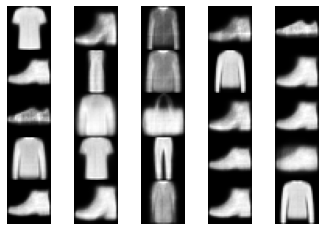

In [13]:
#plot randomly predicted images
#more number of epochs, less blurring
fig, axs=plt.subplots(5,5)
rand=x_test[np.random.randint(0, 10000,25)].reshape((5,5,1,28,28))
for i in range(5):
  for j in range(5):
    axs[i,j].imshow(model.predict(rand[i,j])[0],cmap='gray')
    axs[i,j].axis("off")

plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

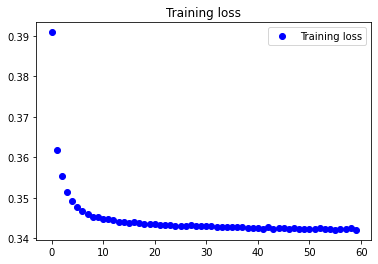

In [14]:
loss=autoencoder_train.history['loss']
epochs=range(60)
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

**Convolutional Autoencoder**

In [15]:
batch_size=128
epochs=50
inChannel=1
x, y=28,28
input_img=Input(shape=(x,y,inChannel))


In [16]:
from sklearn.model_selection import train_test_split
train_data=x_train
train_x,valid_x,train_ground,valid_ground=train_test_split(train_data,train_data,test_size=0.2,random_state=0)

In [17]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
def autoencoder(input_img):
  #encoder
  conv1=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
  pool1=MaxPooling2D(pool_size=(2,2))(conv1)
  conv2=Conv2D(64,(3,3),activation='relu',padding='same')(pool1)
  pool2=MaxPooling2D(pool_size=(2,2))(conv2)
  conv3=Conv2D(128,(3,3),activation='relu',padding='same')(pool2)
  #decoder
  conv4=Conv2D(128,(3,3),activation='relu',padding='same')(conv3)
  up1=UpSampling2D((2,2))(conv4)
  conv5=Conv2D(64,(3,3),activation='relu',padding='same')(up1)
  up2=UpSampling2D((2,2))(conv5)
  decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(up2)
  return decoded


In [18]:
from keras.optimizers import RMSprop
autoencoder=Model(input_img,autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error',optimizer=RMSprop())

In [19]:
autoencoder_train=autoencoder.fit(train_x,train_ground,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_x,valid_ground))

Epoch 1/50
375/375 [==============================] - 11s 13ms/step - loss: 0.0230 - val_loss: 0.0118
Epoch 2/50
375/375 [==============================] - 5s 12ms/step - loss: 0.0095 - val_loss: 0.0072
Epoch 3/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 4/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 5/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 6/50
375/375 [==============================] - 5s 12ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 7/50
375/375 [==============================] - 5s 12ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 8/50
375/375 [==============================] - 5s 12ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 9/50
375/375 [==============================] - 4s 12ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/50
375/375 [==============================] - 5s 12ms/step - loss: 0.0035 - val_l

<ipython-input-24-7fe7b74e75a4>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,val_loss,'b',label='Validation loss',color='red')


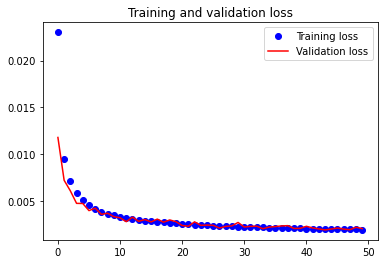

In [24]:
loss=autoencoder_train.history['loss']
val_loss=autoencoder_train.history['val_loss']
epochs=range(50)
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step
Reconstruction of Test Images


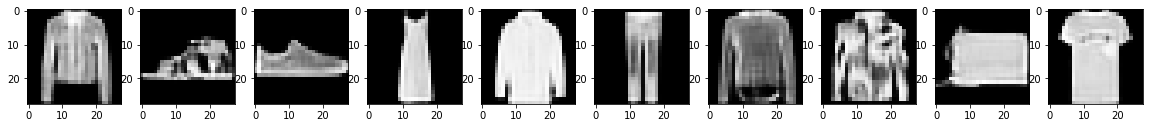

In [25]:
#predict the images
pred=autoencoder.predict(x_test)
plt.figure(figsize=(20,4))
print("Reconstruction of Test Images")
for i in range(10,20,1):
  plt.subplot(2,10,i+1)
  plt.imshow(pred[i, ..., 0],cmap='gray')
plt.show()